# Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
# We start by loading the data
data = pd.read_csv('Data/1.01. Simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [3]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [4]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [5]:
y.shape

(84,)

In [6]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# We start by creating a linear regression object
reg = LinearRegression()

In [8]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

LinearRegression()

### R-squared

In [9]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [10]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [11]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.275040299660279

### Making predictions

In [12]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
# For example, now we want to predict the GPA of Bob and Steve, which the SAT score of each people is 1650 and 1740
SAT_score = np.array([1650, 1740]).reshape(-1, 1)
print("The new shape of the data: ", SAT_score)
reg.predict(SAT_score)

The new shape of the data:  [[1650]
 [1740]]


array([3.00692558, 3.15593751])

In [13]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [14]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


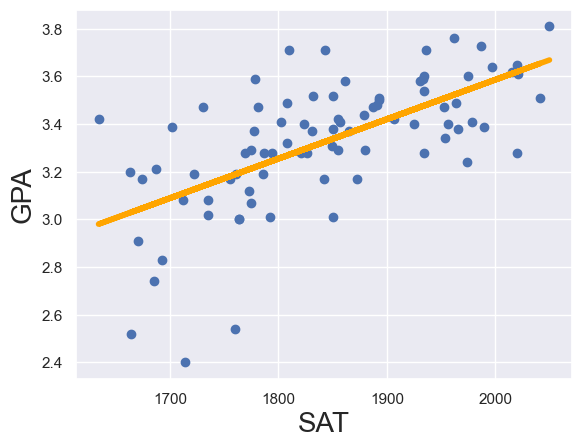

In [16]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple linear regression

## Import the relevant libraries

In [17]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [18]:
# Load the data from a .csv in the same folder
data = pd.read_csv('Data/1.02. Multiple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [19]:
# This method gives us very nice descriptive statistics. We don't need this for now, but will later on!
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create the multiple linear regression

### Declare the dependent and independent variables

In [20]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = data[['SAT','Rand 1,2,3']]

# and a single depended variable: 'GPA'
y = data['GPA']

### Regression itself

In [21]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x,y)

LinearRegression()

In [28]:
# Getting the coefficients of the regression
reg.coef_
# Note that the output is an array

array([ 0.00165354, -0.00826982])

In [29]:
# Getting the intercept of the regression
reg.intercept_
# Note that the result is a float as we usually expect a single value

0.29603261264909353

### Calculating the R-squared

In [30]:
# Get the R-squared of the regression
reg.score(x,y)

0.4066811952814282

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [31]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
x.shape

(84, 2)

In [26]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134

### Adjusted R^2 function

In [32]:
def adj_r_squares(x, y):
    reg = LinearRegression()
    reg.fit(x, y)
    r2 = reg.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r_square = 1 - (1 - r2)*(n-1)/(n-p-1)
    return adj_r_square

In [33]:
adj_r_squares(x, y)

0.39203134825134

## Feature selection
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [35]:
# Import the feature selection module from sklearn
# This module allows us to select the most appopriate features for our regression
# There exist many different approaches to feature selection, however, we will use one of the simplest
from sklearn.feature_selection import f_regression

In [36]:
# We will look into: f_regression
# f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables
# In our case, this would mean running a simple linear regression on GPA where SAT is the independent variable
# and a simple linear regression on GPA where Rand 1,2,3 is the indepdent variable
# The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(x,y)

# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [37]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [38]:
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.676])

### Some comment about the result
#### As we can see, the first p_value is for the "SAT" variable and the other is for the "Rand 1,2,3" variable.
#### The p_value of "Rand 1,2,3" is very very high, so we can't not reject the Null Hypothesis H0 (Ho: Coef = 0) => Coef of the "Rand 1,2,3" is equal to 0. In conclusion, the feature "Rand 1,2,3" doesn't affect the prediction

## Creating a summary table

In [42]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
# or use: reg_summary = pd.DataFrame(data = ["SAT", "Rand 1,2,3"], columns=['Features'])
# but if use the after way, we can't type all the features of the large dataset
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [43]:
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round(3)

In [44]:
# Now we've got a pretty clean summary, which can help us make an informed decision about the inclusion of the variables 
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
